훈련 세트와 테스틑 세트

지도학습: 데이터(돔과 빙어의 길이와 무게 = **특성**)와 정답(빙어=0, 돔 =1)이 같이 주어짐
비지도 학습: 데이터만 있고, 정답이 없음.
강화 학습: ppt 보기

1.0
[0]


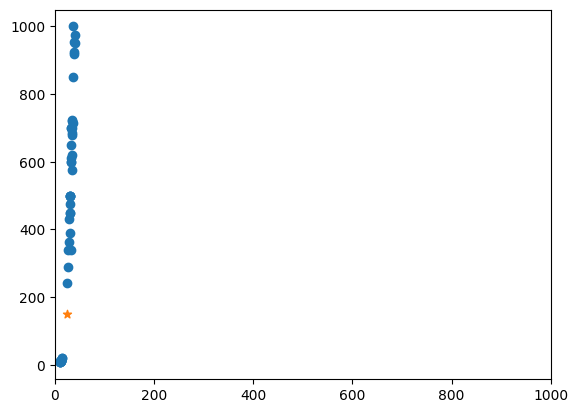

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#사이킷 런 패키지
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
kn = KNeighborsClassifier(n_neighbors=5)

#물고기 데이터(돔+빙어)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0,
                9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
                6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
#1은 돔, 0은 빙어
fish_target = [1]*35 + [0]*14

#훈련 데이터와 테스트 데이터를 구분
#하지만 여기에는 샘플링 편향 오류가 있다. 0-34는 돔 데이터, 35-49는 빙어 데이터라서 훈련은 돔으로 하고서, 테스트는 빙어로 하는꼴이라서 정확도가 0이 나옴.
#train_input = fish_data[0:35] #0~34
#train_target = fish_target[0:35]
#test_input = fish_data[35:50] #35~49
#test_target = fish_target[35:50]

#라이브러리를 사용하는 방법. 훈련 75%, 테스트 25%로 나눠줌.
#빙어와 돔의 데이터의 비율을 stratify이 결정함.
#random은 일종의 시드다. 초로 해야  진짜 랜덤인데, 학습시킬때마다 달라지면 안되니까 42로 고정.
train_input,test_input, train_target,test_target = train_test_split(fish_data,fish_target, stratify=fish_target, random_state=42)

#훈련 데이터로만 학습
kn.fit(train_input,train_target)
#정확도 출력(주어진 데이터에 따른 현재 kn모델의)
print(kn.score(test_input,test_target))

#왜 빙어라 나오냐? x,y축의 단위가 다르기 때문. x,y의 단위가 달라서 그럼. ?cm = ?g으로 따질지가 중요
#그래서 표준 점수(z점수)를 사용. 단위가 달라도 값이 똑같기 때문. 스케일링(특성값을 표준점수로 변환)이 된다는것이 중요.
print(kn.predict([[25,150]]))

plt.scatter(fish_length,fish_weight)
plt.scatter([25],[150],marker='*')
plt.xlim(0,1000)
plt.show()

In [3]:
import numpy as np #파이선이 제공하는 수학 함수
import matplotlib.pyplot as plt
#사이킷 런 패키지
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
kn = KNeighborsClassifier(n_neighbors=5)

#물고기 데이터(돔+빙어)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0,
                9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
                6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
#1은 돔, 0은 빙어
fish_target = [1]*35 + [0]*14

train_input,test_input, train_target,test_target = train_test_split(fish_data,fish_target, stratify=fish_target, random_state=42)

mean = np.mean(train_input,axis= 0)
std = np.std(train_input,axis= 0)

#스케일링
train_scaled = (train_input-mean)/std

kn.fit(train_scaled,train_target)

#확인할때도 표준점수로 변형시킨것을 넣어야함.
new = ([25,150]-mean)/std
print(kn.predict([new]))

[1]
